# Generate and view birefringence skymaps

First import `axion`. Then set model and numerical parameters. We want to generate an all-sky axion-string induced birefringence map using the "loop crossing model" approximation. The relevant command is `axion.lcm.generate_skymap()`. 

In [1]:
import axion
from axion.cosmology import hbarH0, H

print(axion.lcm.generate_skymap.__doc__)

Simulate an all-sky map of birefringence in HEALPix format.
    Parameters
    ----------
    zeta0 : float
        𝜁₀
    xi0 : float
        ξ₀
    anomaly : float
        Anomaly coefficient 𝒜, parameterises the amount of birefringence due to each loop-crossing 
        (Δα = 𝒜/137).
    zf : float
        Redshift at which to terminate the simulation (i.e., when the string network collapses.) If 
        more than one of ma, log10ma, or zf is specified then the program throws an error.
    ma : float
        Axion mass in eV. Used to determine zf, if zf is not given. If more than one of ma, log10ma, 
        or zf is specified then the program throws an error.
    log10ma : float
        Base-10 log of axion mass in eV. (This is useful if you want to scan parameter space linearly 
        in log10ma.) Used to determine zf by the relation 3*H(zf) = ma, if zf is not given. If more than 
        one of ma, log10ma, or zf is specified then the program throws an error.
    nside : int
 

This tells us that we must set `zeta0`, `xi0`, `anomaly`, and one of either `zf`, `ma`, or `log10ma`. 

In [2]:
lcm_params = dict(zeta0=1., xi0=1., anomaly=1., zf=0.) # zf = 0 is equivalent to ma = 3*hbarH0*H(0)
# or equivalently
lcm_params = dict(zeta0=1., xi0=1., anomaly=1., ma=3*hbarH0*H(0)) # here, hbarH0 is H0 in units of eV and H(z) is actually the Hubble parameter divided by H0.
num_params = dict(nside=128, Nsteps=28, Nvertices=50, degrees=True)

sky = axion.lcm.generate_skymap(**lcm_params, **num_params)

To view  Mollweide projection of this we can do

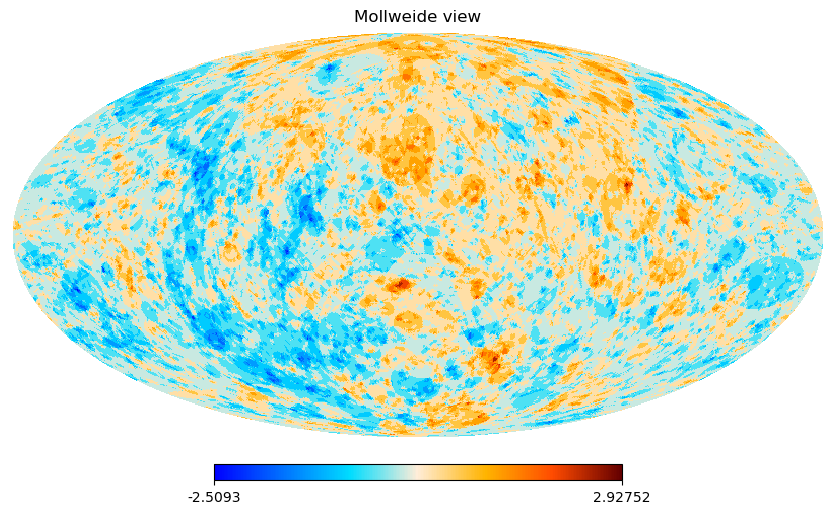

In [3]:
import healpy as hp

hp.mollview(sky, cmap='planck') # cmap = 'planck' isn't available by default in healpy, I wrote a routine that adds it to the colormaps when you import axion.